# 用户指南

用户指南按主题区域涵盖所有熊猫。每个小节都介绍了一个主题（例如"处理缺失的数据"），并讨论了熊猫如何处理这个问题，并举了很多例子。

**pandas** 官方文档 : https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide

## 10 分钟体验pandas

这是熊猫的简短介绍，主要面向新用户。你可以在教程中看到更复杂的数据操作.

按照惯例，我们演示如下：


In [1]:
import numpy as np

import pandas as pd

## 对象创建
通过传递值列表创建 Series ，让 pandas 创建默认整数索引：

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过 NumPy 阵列创建DataFrame，其中带有日期时间索引和标记列：

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.694882,-0.019432,0.585831,-0.381029
2013-01-02,0.678495,0.971696,1.112416,-0.569820
2013-01-03,-0.419630,0.090373,-1.025176,-0.841699
2013-01-04,-0.374271,0.122785,-0.591558,-1.617607
2013-01-05,-0.795299,0.987344,0.355418,-0.430621
2013-01-06,-0.419522,0.692337,-0.111968,-0.302903


通过传递可转换为类似系列的对象的听写来创建DataFrame。

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


生成DataFrame的列具有不同的 DataFram类型.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

如果您正在使用 IPython，则自动启用列名（以及公共属性）的选项卡完成。下面是将要完成的属性的子集：
f2.<TAB>  # noqa: E225, E999
    
df2.A                  df2.bool
    
df2.abs                df2.boxplot
    
df2.add                df2.C
    
df2.add_prefix         df2.clip
    
df2.add_suffix         df2.columns
    
df2.align              df2.copy
    
df2.all                df2.count
    
df2.any                df2.combine
    
df2.append             df2.D
    
df2.apply              df2.describe
    
df2.applymap           df2.diff
    
df2.B                  df2.duplicated
    
## 查看数据
以下是如何查看框架的顶部和底部行：

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.694882,-0.019432,0.585831,-0.381029
2013-01-02,0.678495,0.971696,1.112416,-0.569820
2013-01-03,-0.419630,0.090373,-1.025176,-0.841699
2013-01-04,-0.374271,0.122785,-0.591558,-1.617607
2013-01-05,-0.795299,0.987344,0.355418,-0.430621


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.374271,0.122785,-0.591558,-1.617607
2013-01-05,-0.795299,0.987344,0.355418,-0.430621
2013-01-06,-0.419522,0.692337,-0.111968,-0.302903


显示索引、列：

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

 DataFrame.to_numpy()提供了基础数据的 NumPy 表示。请注意，当DataFrame具有具有不同数据类型的列时，这可能是一个开销大的操作，这归结为 pandas 和 NumPy 之间的根本区别：NumPy 阵列为整个阵列提供一个 dtype，而熊猫数据帧每个列有一个 dtype。当你打电话给DataFrame.to_numpy()时，熊猫会发现NumPy dtype，它可以容纳数据帧中所有的dtype。这可能最终成为object，这需要铸造每一个值到Python对象。

In [11]:
df.to_numpy()

array([[-0.69488193, -0.01943221,  0.58583132, -0.38102917],
       [ 0.67849534,  0.97169551,  1.11241558, -0.56981995],
       [-0.41962979,  0.0903727 , -1.0251757 , -0.84169874],
       [-0.37427096,  0.12278471, -0.59155757, -1.61760684],
       [-0.79529914,  0.98734405,  0.35541848, -0.43062098],
       [-0.41952158,  0.69233673, -0.11196798, -0.30290251]])

对于 df2 来说，具有多个 dtype类型 DataFrame DataFrame.to_numpy()相对较贵

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

describe()显示数据的快速统计摘要：

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.337518,0.474184,0.054161,-0.690613
std,0.526189,0.463226,0.787763,0.492035
min,-0.795299,-0.019432,-1.025176,-1.617607
25%,-0.626069,0.098476,-0.471660,-0.773729
50%,-0.419576,0.407561,0.121725,-0.500220
75%,-0.385584,0.901856,0.528228,-0.393427
max,0.678495,0.987344,1.112416,-0.302903


转换数据：

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,6.0,-0.337518,0.526189,-0.795299,-0.626069,-0.419576,-0.385584,0.678495
B,6.0,0.474184,0.463226,-0.019432,0.098476,0.407561,0.901856,0.987344
C,6.0,0.054161,0.787763,-1.025176,-0.471660,0.121725,0.528228,1.112416
D,6.0,-0.690613,0.492035,-1.617607,-0.773729,-0.500220,-0.393427,-0.302903


按列排序：

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.381029,0.585831,-0.019432,-0.694882
2013-01-02,-0.569820,1.112416,0.971696,0.678495
2013-01-03,-0.841699,-1.025176,0.090373,-0.419630
2013-01-04,-1.617607,-0.591558,0.122785,-0.374271
2013-01-05,-0.430621,0.355418,0.987344,-0.795299
2013-01-06,-0.302903,-0.111968,0.692337,-0.419522


按值排序：

In [16]:
df.sort_values(by="B")

,A,B,C,D
2013-01-01,-0.694882,-0.019432,0.585831,-0.381029
2013-01-03,-0.419630,0.090373,-1.025176,-0.841699
2013-01-04,-0.374271,0.122785,-0.591558,-1.617607
2013-01-06,-0.419522,0.692337,-0.111968,-0.302903
2013-01-02,0.678495,0.971696,1.112416,-0.569820
2013-01-05,-0.795299,0.987344,0.355418,-0.430621


## 获取
选择一个列，产生一个Series，相当于df.A:

In [17]:
df["A"]

2013-01-01   -0.694882
2013-01-02    0.678495
2013-01-03   -0.419630
2013-01-04   -0.374271
2013-01-05   -0.795299
2013-01-06   -0.419522
Freq: D, Name: A, dtype: float64

通过[]进行选择，从而分割行。

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.694882,-0.019432,0.585831,-0.381029
2013-01-02,0.678495,0.971696,1.112416,-0.569820
2013-01-03,-0.419630,0.090373,-1.025176,-0.841699


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.678495,0.971696,1.112416,-0.569820
2013-01-03,-0.419630,0.090373,-1.025176,-0.841699
2013-01-04,-0.374271,0.122785,-0.591558,-1.617607


## 按标签选择


使用标签获取横截面：

In [20]:
df.loc[dates[0]]

A   -0.694882
B   -0.019432
C    0.585831
D   -0.381029
Name: 2013-01-01 00:00:00, dtype: float64

按标签在多轴上选择：

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.694882,-0.019432
2013-01-02,0.678495,0.971696
2013-01-03,-0.419630,0.090373
2013-01-04,-0.374271,0.122785
2013-01-05,-0.795299,0.987344
2013-01-06,-0.419522,0.692337


显示标签切片时，两个端点都包括在内:

In [22]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.678495,0.971696
2013-01-03,-0.419630,0.090373
2013-01-04,-0.374271,0.122785


In [23]:
df.loc["20130102", ["A", "B"]]

A    0.678495
B    0.971696
Name: 2013-01-02 00:00:00, dtype: float64

获得扩展值：

In [24]:
df.loc[dates[0], "A"]

-0.6948819333195682

In [25]:
df.at[dates[0], "A"]

-0.6948819333195682

## 按位置选择

通过通过的整数位置进行选择：

In [26]:
df.iloc[3]

A   -0.374271
B    0.122785
C   -0.591558
D   -1.617607
Name: 2013-01-04 00:00:00, dtype: float64

通过整数切片，作用类似于NumPy/Python：

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.374271,0.122785
2013-01-05,-0.795299,0.987344


按整数位置位置列表，类似于 NumPy/Python 样式：

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.678495,1.112416
2013-01-03,-0.419630,-1.025176
2013-01-05,-0.795299,0.355418


对于明确切片行：

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.678495,0.971696,1.112416,-0.569820
2013-01-03,-0.419630,0.090373,-1.025176,-0.841699


对于切片列，明确：

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.019432,0.585831
2013-01-02,0.971696,1.112416
2013-01-03,0.090373,-1.025176
2013-01-04,0.122785,-0.591558
2013-01-05,0.987344,0.355418
2013-01-06,0.692337,-0.111968


明确获取价值：

In [31]:
df.iloc[1, 1]

0.9716955098745442

对于快速访问缩放（相当于先前的方法）：

In [32]:
df.iat[1, 1]

0.9716955098745442

## 布尔索引

使用单列的值来选择数据。

In [33]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.678495,0.971696,1.112416,-0.56982


从满足条件的数据帧中选择值。

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.585831,NaN
2013-01-02,0.678495,0.971696,1.112416,NaN
2013-01-03,NaN,0.090373,NaN,NaN
2013-01-04,NaN,0.122785,NaN,NaN
2013-01-05,NaN,0.987344,0.355418,NaN
2013-01-06,NaN,0.692337,NaN,NaN


使用isin()过滤方法：

In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,-0.694882,-0.019432,0.585831,-0.381029,one
2013-01-02,0.678495,0.971696,1.112416,-0.569820,one
2013-01-03,-0.419630,0.090373,-1.025176,-0.841699,two
2013-01-04,-0.374271,0.122785,-0.591558,-1.617607,three
2013-01-05,-0.795299,0.987344,0.355418,-0.430621,four
2013-01-06,-0.419522,0.692337,-0.111968,-0.302903,three


In [36]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.419630,0.090373,-1.025176,-0.841699,two
2013-01-05,-0.795299,0.987344,0.355418,-0.430621,four


## 设置

设置新列会自动按索引对齐数据。

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1

按标签设置值：

In [39]:
df.at[dates[0], "A"] = 0

通过分配 NumPy 阵列进行设置：

In [40]:
df.loc[:, "D"] = np.array([5] * len(df))

先前设置操作的结果。

In [41]:
df

,A,B,C,D,F
2013-01-01,0.000000,-0.019432,0.585831,5,NaN
2013-01-02,0.678495,0.971696,1.112416,5,1.0
2013-01-03,-0.419630,0.090373,-1.025176,5,2.0
2013-01-04,-0.374271,0.122785,-0.591558,5,3.0
2013-01-05,-0.795299,0.987344,0.355418,5,4.0
2013-01-06,-0.419522,0.692337,-0.111968,5,5.0


操作where设置。

In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-0.019432,-0.585831,-5,NaN
2013-01-02,-0.678495,-0.971696,-1.112416,-5,-1.0
2013-01-03,-0.419630,-0.090373,-1.025176,-5,-2.0
2013-01-04,-0.374271,-0.122785,-0.591558,-5,-3.0
2013-01-05,-0.795299,-0.987344,-0.355418,-5,-4.0
2013-01-06,-0.419522,-0.692337,-0.111968,-5,-5.0


## 缺少数据

pandas主要使用 np.nan 来表示缺失的数据。默认情况下，它不包括在计算中。请参阅"缺失数据"部分.

驯鹿行允许您更改/添加/删除指定轴上的索引。这返回数据的副本。

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,-0.019432,0.585831,5,NaN,1.0
2013-01-02,0.678495,0.971696,1.112416,5,1.0,1.0
2013-01-03,-0.419630,0.090373,-1.025176,5,2.0,NaN
2013-01-04,-0.374271,0.122785,-0.591558,5,3.0,NaN


丢弃任何缺少数据的行。

In [44]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.678495,0.971696,1.112416,5,1.0,1.0


填写缺失的数据。

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,-0.019432,0.585831,5,5.0,1.0
2013-01-02,0.678495,0.971696,1.112416,5,1.0,1.0
2013-01-03,-0.419630,0.090373,-1.025176,5,2.0,5.0
2013-01-04,-0.374271,0.122785,-0.591558,5,3.0,5.0


得到布尔面具， 其中值是nan.

In [46]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 统计

操作一般排除缺失的数据。

执行描述性统计：

In [47]:
df.mean()

A   -0.221704
B    0.474184
C    0.054161
D    5.000000
F    3.000000
dtype: float64

另一轴上的相同操作：

In [48]:
df.mean(1)

2013-01-01    1.391600
2013-01-02    1.752521
2013-01-03    1.129113
2013-01-04    1.431391
2013-01-05    1.909493
2013-01-06    2.032169
Freq: D, dtype: float64

与具有不同尺寸且需要对齐的对象一起操作。此外，大熊猫会按照指定的尺寸自动广播。

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.419630,-0.909627,-2.025176,4.0,1.0
2013-01-04,-3.374271,-2.877215,-3.591558,2.0,0.0
2013-01-05,-5.795299,-4.012656,-4.644582,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## 应用

将功能应用于数据：

In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,-0.019432,0.585831,5,NaN
2013-01-02,0.678495,0.952263,1.698247,10,1.0
2013-01-03,0.258866,1.042636,0.673071,15,3.0
2013-01-04,-0.115405,1.165421,0.081514,20,6.0
2013-01-05,-0.910705,2.152765,0.436932,25,10.0
2013-01-06,-1.330226,2.845101,0.324964,30,15.0


In [52]:
df.apply(lambda x: x.max() - x.min())

A    1.473794
B    1.006776
C    2.137591
D    0.000000
F    4.000000
dtype: float64

## 直方图

查看更多直方图和脱色.

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    4
1    2
2    2
3    4
4    3
5    0
6    5
7    0
8    4
9    5
dtype: int32

In [54]:
s.value_counts()

4    3
2    2
0    2
5    2
3    1
dtype: int64

## 字符串方法

系列在str属性中配备了一组字符串处理方法，便于在阵列的每个元素上操作，如下图片段中所示。请注意，在str中的模式匹配通常默认使用常规表达式（在某些情况下始终使用它们）。查看更多矢量字符串方法.

In [55]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并
### 康卡特

在连接/合并型操作的情况下，熊猫为各种索引和关系代数功能提供了各种设施，便于将系列和数据帧对象与各种设置逻辑相结合。

请参阅合并部分.

将大熊猫物体与concat() :

In [56]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,0.353591,-0.846529,-0.282417,-0.130753
1,0.970226,-0.500620,0.345430,0.395994
2,1.014176,1.176170,0.247709,0.379087
3,-1.166246,0.762992,-0.859910,0.164724
4,-1.414599,0.607288,1.946452,0.140375
5,1.126565,-0.057432,-0.134079,-1.424725
6,0.816572,0.398571,0.292453,1.682333
7,-1.177657,2.385182,-1.174228,-0.996019
8,-0.881235,-1.083279,-0.943865,-0.089970
9,0.285113,1.729293,1.305498,-0.025043


In [57]:
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,0.353591,-0.846529,-0.282417,-0.130753
1,0.970226,-0.500620,0.345430,0.395994
2,1.014176,1.176170,0.247709,0.379087
3,-1.166246,0.762992,-0.859910,0.164724
4,-1.414599,0.607288,1.946452,0.140375
5,1.126565,-0.057432,-0.134079,-1.424725
6,0.816572,0.398571,0.292453,1.682333
7,-1.177657,2.385182,-1.174228,-0.996019
8,-0.881235,-1.083279,-0.943865,-0.089970
9,0.285113,1.729293,1.305498,-0.025043


## 加入

SQL 风格合并。请参阅数据库样式连接部分。

In [58]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [59]:
right

,key,rval
0,foo,4
1,foo,5


In [60]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## 分组

通过"逐组"，我们指的是涉及以下一个或多个步骤的过程：

      *  根据某些标准将数据拆分为组

      *  独立地将功能应用于每个组

      *  将结果组合到数据结构中

请参阅分组部分.

In [61]:
df = pd.DataFrame(

    {

        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],

        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],

        "C": np.random.randn(8),

        "D": np.random.randn(8),

    }

)
df

,A,B,C,D
0,foo,one,-0.653290,0.099314
1,bar,one,0.011997,0.590227
2,foo,two,0.700523,-0.387955
3,bar,three,0.023750,0.719952
4,foo,two,0.089690,0.245830
5,bar,two,0.547005,0.322184
6,foo,one,0.252010,0.844336
7,foo,three,-0.419885,0.018981


分组，然后将sum()功能应用于生成的组。

In [62]:
df.groupby("A").sum()

,C,D
A,,
bar,0.582752,1.632364
foo,-0.030953,0.820506


In [63]:
df.groupby("A").sum()

,C,D
A,,
bar,0.582752,1.632364
foo,-0.030953,0.820506


In [64]:
tuples = list(

    zip(

        *[

            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],

            ["one", "two", "one", "two", "one", "two", "one", "two"],

        ]

    )

)



index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df2

A         B
first second                    
bar   one     0.599670  0.253220
      two     0.295208 -0.224526
baz   one    -1.474671  0.505637
      two    -0.038403  0.440442

stack()方法"压缩"数据帧列中的一个关卡。

In [65]:
stacked = df2.stack()

stacked

first  second   
bar    one     A    0.599670
               B    0.253220
       two     A    0.295208
               B   -0.224526
baz    one     A   -1.474671
               B    0.505637
       two     A   -0.038403
               B    0.440442
dtype: float64

与"堆叠"数据帧或系列（具有MultiIndexindex），stack()的反向操作是unstack()默认情况下，该堆栈无法堆叠最后一个级别:

In [66]:
stacked.unstack()

A         B
first second                    
bar   one     0.599670  0.253220
      two     0.295208 -0.224526
baz   one    -1.474671  0.505637
      two    -0.038403  0.440442

In [67]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.599670  0.295208
      B  0.253220 -0.224526
baz   A -1.474671 -0.038403
      B  0.505637  0.440442

In [68]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.599670 -1.474671
       B  0.253220  0.505637
two    A  0.295208 -0.038403
       B -0.224526  0.440442

## 枢轴表¶

请参阅枢轴表上的部分.

In [69]:
df = pd.DataFrame(

    {

        "A": ["one", "one", "two", "three"] * 3,

        "B": ["A", "B", "C"] * 4,

        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,

        "D": np.random.randn(12),

        "E": np.random.randn(12),

    }

)

df

,A,B,C,D,E
0,one,A,foo,-0.863863,-1.989308
1,one,B,foo,-1.029928,-0.631623
2,two,C,foo,0.081603,0.278476
3,three,A,bar,1.565266,-1.693786
4,one,B,bar,0.921142,0.473384
5,one,C,bar,0.512301,-0.811014
6,two,A,foo,-0.154880,0.770380
7,three,B,foo,0.229875,1.138788
8,one,C,foo,0.469934,-0.429647
9,one,A,bar,-1.565564,-2.849605


我们可以非常轻松地从这些数据中生成枢轴表：

In [70]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.565564 -0.863863
      B  0.921142 -1.029928
      C  0.512301  0.469934
three A  1.565266       NaN
      B       NaN  0.229875
      C -0.196701       NaN
two   A       NaN -0.154880
      B  0.233956       NaN
      C       NaN  0.081603

## 时间系列

熊猫具有简单、强大和高效的功能，可在变频过程中执行重新采样操作（例如，将次要数据转换为 5 分钟数据）。这在财务申请中非常常见，但不限于财务申请。查看时间系列部分.

In [71]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

2012-01-01    28220
Freq: 5T, dtype: int32

时区表示：

In [72]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -1.225856
2012-03-07    0.614685
2012-03-08   -1.070512
2012-03-09    0.822835
2012-03-10    0.863865
Freq: D, dtype: float64

In [73]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00   -1.225856
2012-03-07 00:00:00+00:00    0.614685
2012-03-08 00:00:00+00:00   -1.070512
2012-03-09 00:00:00+00:00    0.822835
2012-03-10 00:00:00+00:00    0.863865
Freq: D, dtype: float64

转换为另一个时区：

In [74]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -1.225856
2012-03-06 19:00:00-05:00    0.614685
2012-03-07 19:00:00-05:00   -1.070512
2012-03-08 19:00:00-05:00    0.822835
2012-03-09 19:00:00-05:00    0.863865
Freq: D, dtype: float64

在时间跨度表示之间转换：

In [75]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31    0.219313
2012-02-29    0.453971
2012-03-31   -0.725823
2012-04-30   -0.844536
2012-05-31    0.639256
Freq: M, dtype: float64

In [76]:
ps = ts.to_period()

ps

2012-01    0.219313
2012-02    0.453971
2012-03   -0.725823
2012-04   -0.844536
2012-05    0.639256
Freq: M, dtype: float64

In [77]:
ps.to_timestamp()

2012-01-01    0.219313
2012-02-01    0.453971
2012-03-01   -0.725823
2012-04-01   -0.844536
2012-05-01    0.639256
Freq: MS, dtype: float64

在句点和时间戳之间转换，可以使用一些方便的算术功能。在下示例中，我们将季度频率转换为季度末的季度频率，从 11 月结束的年份转换为季度末的月末上午 9 点：

In [78]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00   -0.746630
1990-06-01 09:00    0.880026
1990-09-01 09:00   -0.981819
1990-12-01 09:00   -1.319755
1991-03-01 09:00   -0.334677
Freq: H, dtype: float64

## 分类

熊猫可以在DataFrame中包括绝对数据。有关完整文档，请参阅分类介绍和API 文档.

In [79]:
df = pd.DataFrame(

    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}

)


将原始等级转换为分类数据类型。

In [80]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别重命名为更有意义的名称（分配给Series.cat.categories()已到位！

In [81]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排列类别并同时添加缺失的类别（默认情况下Series.cat()下的方法返回新Series）。

In [82]:
df["grade"] = df["grade"].cat.set_categories(

    ["very bad", "bad", "medium", "good", "very good"]

)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

排序是按类别排序的，而不是词汇顺序。

In [83]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按分类列分组也显示空类别。

In [84]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 标图

请参阅绘图文档。

我们使用标准公约引用 matplotlib API：

In [85]:
import matplotlib.pyplot as plt

plt.close("all")

Duplicate key in file WindowsPath('e:/ruanjian/python38/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 770 ('font.family        : sans-serif       ')
Duplicate key in file WindowsPath('e:/ruanjian/python38/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 771 ('font.sans-serif    : SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif ')
Duplicate key in file WindowsPath('e:/ruanjian/python38/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 772 ('axes.unicode_minus:False')


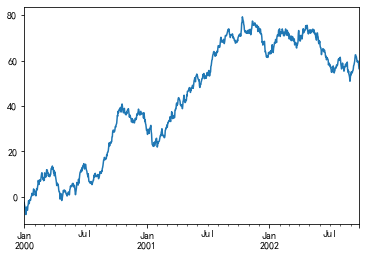

In [86]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 432x288 with 0 Axes>

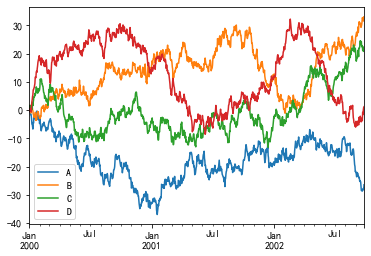

In [88]:
df = pd.DataFrame(

    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]

)



df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

## 获取数据¶
CSV

写给 csv 文件。

In [89]:
df.to_csv("foo.csv")

In [90]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.744773,-0.205604,0.839380,-0.488795
1,2000-01-02,1.348746,0.610450,0.129965,0.572965
2,2000-01-03,1.165531,1.705833,1.626404,0.495703
3,2000-01-04,-0.484729,1.701581,0.014605,0.151848
4,2000-01-05,-1.565003,-0.077028,0.601265,-0.219372
...,...,...,...,...,...
995,2002-09-22,-28.338652,32.490615,21.192947,-0.799968
996,2002-09-23,-27.866733,31.711817,20.945316,-1.590785
997,2002-09-24,-27.721489,32.360103,22.328668,0.052837
998,2002-09-25,-28.150661,33.010123,20.974735,0.888153


In [91]:
import pandas as pd 

df = pd.read_csv('data.txt',encoding='utf8')
df

,Column1,Column2
0,a,art.一(个)；每一(个)
1,abandon,vt.丢弃；放弃，抛弃
2,ability,n.能力；能耐，本领
3,able,a.有能力的；出色的
4,abnormal,a.不正常的；变态的
...,...,...
2627,numerous,a.为数众多的；许多
2628,nurse,n.保姆；护士
2629,nursery,n.托儿所；苗圃
2630,nut,n.坚果，干果；螺母
